# Movie Review Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df1 = pd.read_csv('Data/moviereviews.tsv', sep='\t')
df2 = pd.read_csv('Data/moviereviews2.tsv', sep='\t')
df=pd.concat([df1,df2])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8000 non-null   object
 1   review  7945 non-null   object
dtypes: object(2)
memory usage: 187.5+ KB


In [4]:
df.isnull().sum()

label      0
review    55
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
senti=df["label"].value_counts()

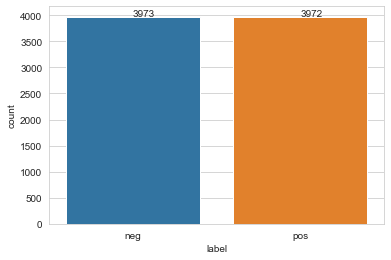

In [7]:
sns.countplot(df["label"])
count=0
for i in senti.values:
    plt.text(count,i+10,str(i))
    count+=1

In [8]:
#remove blank strings
blanks = []
for i,lb,rv in df.itertuples():
    if type(rv)==str:
        if rv.isspace():
            blanks.append(i)
df.drop(blanks, inplace=True)

In [9]:
d=df.groupby("label")["review"].apply(lambda col: ''.join(col))

In [10]:
d

label
neg    how do films like mouse hunt get into theatres...
pos    this has been an extraordinary year for austra...
Name: review, dtype: object

In [11]:
len(d["neg"].split())

1203796

In [12]:
from collections import Counter 

In [13]:
d_neg=dict(Counter(d["neg"].split()))

In [14]:
len(d_neg.keys())

78195

In [15]:
d_pos=dict(Counter(d["pos"].split()))

In [16]:
len(d_pos.keys())

79479

In [17]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

# Naïve Bayes Model:
text_clf_nb = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')),
                        ('feature_selector', SelectFromModel(MultinomialNB())),
                     ('classifier', MultinomialNB()),
])

# Linear SVC Model:
text_clf_lsvc = Pipeline([('vectorizer', TfidfVectorizer(stop_words='english')),
                          ('feature_selector', SelectFromModel(LinearSVC())),
                     ('classifier', LinearSVC()),
])

# Train both models on the moviereviews.tsv training set:
text_clf_nb.fit(X_train, y_train)
text_clf_lsvc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                                                     multi_class='ovr',
                                                     penalty='l2',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
              

In [19]:
# Form a prediction set
predictions = text_clf_nb.predict(X_test)


In [20]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))


[[699 114]
 [352 414]]


In [21]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.67      0.86      0.75       813
         pos       0.78      0.54      0.64       766

    accuracy                           0.70      1579
   macro avg       0.72      0.70      0.69      1579
weighted avg       0.72      0.70      0.70      1579



In [22]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7048765041165295


In [23]:
# Form a prediction set
predictions = text_clf_lsvc.predict(X_test)

In [24]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[733  80]
 [ 54 712]]


In [25]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.93      0.90      0.92       813
         pos       0.90      0.93      0.91       766

    accuracy                           0.92      1579
   macro avg       0.92      0.92      0.92      1579
weighted avg       0.92      0.92      0.92      1579



In [26]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.915136162127929


#### write your own review

In [27]:
#try these
#movie I really wanted to love was terrible.I'm sure the producers had the best intentions, but the execution was lacking.
#this is a great movie
#this is not a great movie
#not a good movie


myreview = "movie I really wanted to love was terrible.I'm sure the producers had the best intentions, but the execution was lacking"

In [28]:
print(text_clf_nb.predict([myreview])) 

['pos']


In [29]:
print(text_clf_lsvc.predict([myreview]))

['neg']
